Combined shape: (6497, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1    

C:\Users\user\AppData\Local\Temp\ipykernel_10960\239627990.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='coolwarm')


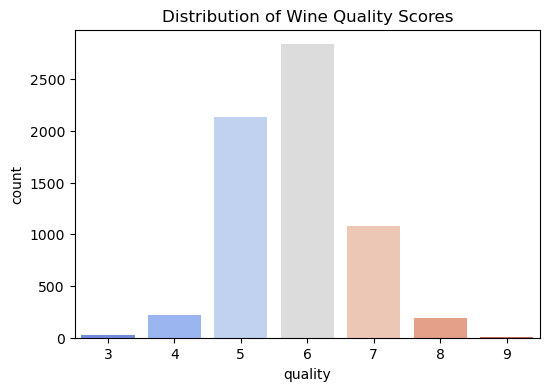

good
0    5220
1    1277
Name: count, dtype: int64

Logistic Regression Results
Accuracy: 0.8215384615384616
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1044
           1       0.61      0.26      0.37       256

    accuracy                           0.82      1300
   macro avg       0.73      0.61      0.63      1300
weighted avg       0.80      0.82      0.79      1300


Random Forest Results
Accuracy: 0.8861538461538462
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1044
           1       0.80      0.56      0.66       256

    accuracy                           0.89      1300
   macro avg       0.85      0.76      0.80      1300
weighted avg       0.88      0.89      0.88      1300



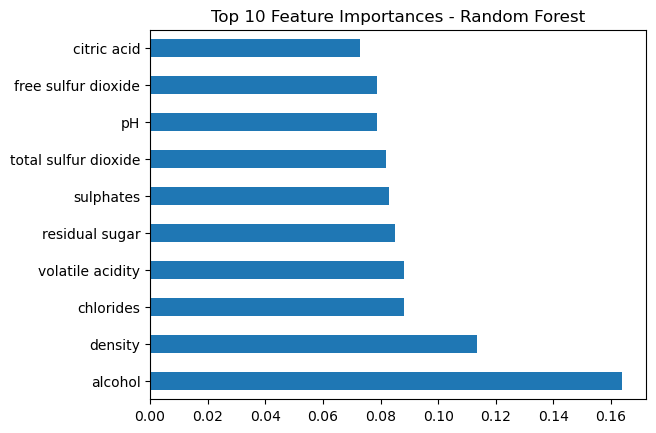


Multi-class Random Forest Accuracy: 0.6946153846153846
[[  0   0   4   2   0   0   0]
 [  0   7  21  14   1   0   0]
 [  0   1 306 117   4   0   0]
 [  0   1  74 451  39   2   0]
 [  0   0   4  86 125   1   0]
 [  0   0   1  11  13  14   0]
 [  0   0   0   0   1   0   0]]


In [1]:
# --------------------------------------------
# Wine Quality Project - Combined Red & White
# --------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Load Data ---------------------------------------------------------------
red = pd.read_csv("winequality-red.csv", sep=';')
white = pd.read_csv("winequality-white.csv", sep=';')

red['type'] = 'red'
white['type'] = 'white'

df = pd.concat([red, white], ignore_index=True)
print("Combined shape:", df.shape)
print(df.head())

# 2. Optional: Quick EDA -----------------------------------------------------
print("\nMissing values:\n", df.isnull().sum())
print("\nQuality counts:\n", df['quality'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df, palette='coolwarm')
plt.title("Distribution of Wine Quality Scores")
plt.show()

# 3. Create Binary Target -----------------------------------------------------
# Good (1) if quality >= 7 else 0
df['good'] = (df['quality'] >= 7).astype(int)
print(df['good'].value_counts())

# Features & target
X = df.drop(columns=['quality','good','type'])
y = df['good']

# 4. Train/Test Split & Scaling ----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 5. Logistic Regression Model -----------------------------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6. Random Forest (often stronger) ------------------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # tree models don't need scaling

rf_pred = rf.predict(X_test)
print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Feature importance plot
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

# 7. Optional Multi-class Model (predict exact quality) ----------------------
X_multi = df.drop(columns=['quality','good','type'])
y_multi = df['quality']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

scaler_multi = StandardScaler()
X_train_m_scaled = scaler_multi.fit_transform(X_train_m)
X_test_m_scaled  = scaler_multi.transform(X_test_m)

rf_multi = RandomForestClassifier(n_estimators=200, random_state=42)
rf_multi.fit(X_train_m, y_train_m)

multi_pred = rf_multi.predict(X_test_m)
print("\nMulti-class Random Forest Accuracy:", accuracy_score(y_test_m, multi_pred))
print(confusion_matrix(y_test_m, multi_pred))


In [5]:
# -------------------------------------------------
# 1️⃣ Imports
# -------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# -------------------------------------------------
# 2️⃣ Load & Combine the Red and White wine datasets
# -------------------------------------------------
red   = pd.read_csv("winequality-red.csv", sep=';')
white = pd.read_csv("winequality-white.csv", sep=';')

red['type']   = 'red'
white['type'] = 'white'

df = pd.concat([red, white], ignore_index=True)

# -------------------------------------------------
# 3️⃣ Create Target Column
#     good = 1 if quality >=7 else 0
# -------------------------------------------------
df['good'] = (df['quality'] >= 7).astype(int)

# -------------------------------------------------
# 4️⃣ Prepare Features
# -------------------------------------------------
X = df.drop(columns=['quality', 'good'])
# one-hot encode wine type (red/white)
X = pd.get_dummies(X, columns=['type'], drop_first=True)
y = df['good']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------------------
# 5️⃣ 5-Fold Cross-Validation for model comparison
# -------------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic": LogisticRegression(max_iter=200, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    print(f"\n{name} 5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# -------------------------------------------------
# 6️⃣ Final Train/Test Split for detailed metrics
# -------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

final_model = RandomForestClassifier(n_estimators=200, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\n=== Final Test Results (Random Forest) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic 5-Fold CV Accuracy: 0.8171 ± 0.0075

RandomForest 5-Fold CV Accuracy: 0.8890 ± 0.0082

=== Final Test Results (Random Forest) ===
Accuracy: 0.8854

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1044
           1       0.80      0.56      0.66       256

    accuracy                           0.89      1300
   macro avg       0.85      0.76      0.79      1300
weighted avg       0.88      0.89      0.88      1300

Confusion Matrix:
 [[1008   36]
 [ 113  143]]
